In [2]:
import numpy as np
import random
import pandas as pd

In [30]:
# load the data
pop = pd.read_csv('../../data/curated/vic_population_density_sa2.csv', index_col = 0)

pop = pop.drop(columns=["S/T name"])
pop = pop.drop(columns=["SA2 name"])
for y in range(2001, 2022):
    col_name = "population_density_of_"+str(y)
    pop[str(y)] = pop[col_name]
    pop = pop.drop(columns=[col_name])

pop = pop.melt(id_vars=["SA2 code"], 
        var_name="year", 
        value_name="population_rate")
pop.head()
# pop = pop.loc[pop['SA2 code']==201011001]
pop = pd.get_dummies(pop, columns=['SA2 code'])
pop
# pop.dtypes

,year,population_rate,SA2 code_201011001,SA2 code_201011002,SA2 code_201011005,SA2 code_201011006,SA2 code_201011007,SA2 code_201011008,SA2 code_201011481,SA2 code_201011482,...,SA2 code_217031471,SA2 code_217031472,SA2 code_217031473,SA2 code_217031474,SA2 code_217031475,SA2 code_217031476,SA2 code_217041477,SA2 code_217041478,SA2 code_217041479,SA2 code_217041480
0,2001,109.222011,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,927.177419,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,103.100775,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,121.461988,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,31.680993,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,2021,2.641610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10958,2021,2.133525,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10959,2021,4.889096,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10960,2021,359.967949,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# define features and outcome
features = list(pop.columns)
features.remove('population_rate')
outcome = ['population_rate']

# partition data into training and test sets
X = pop[features]
y = pop[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)# , random_state = 42)

# train model
reg = LinearRegression()
reg.fit(x_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    x_test, y_test = resample(x_train, y_train, replace=True)
    # evaluate model
    r2_score = reg.score(x_test, y_test)
    accuracy.append(r2_score)

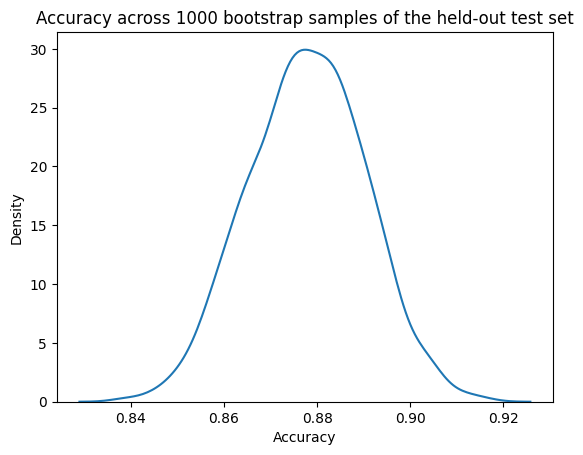

In [37]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [39]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.88 with a 95% a confidence interval of [0.85,0.90].


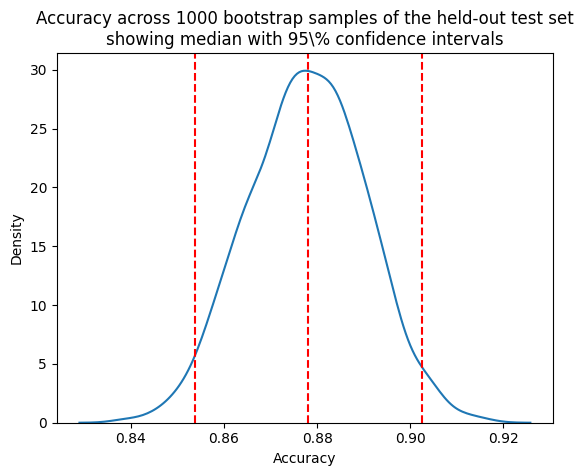

In [40]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()